<a href="https://colab.research.google.com/github/ManishhDTU/DS-and-ML-project/blob/main/handwritten.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Hand written Digit Prediction - Classification Analysis**

The digits dataset consists of 8x8 pixel images of digits. The images attribute of the dataset stores 8x8 arrays of grayscale values for each Image. We will use these arrays to visualize the first 4 images. The target attribute of the dataset stores the digit each image represents

## **Import Library**

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

## **Import Data**

In [4]:
from sklearn.datasets import load_digits

In [5]:
df = load_digits()

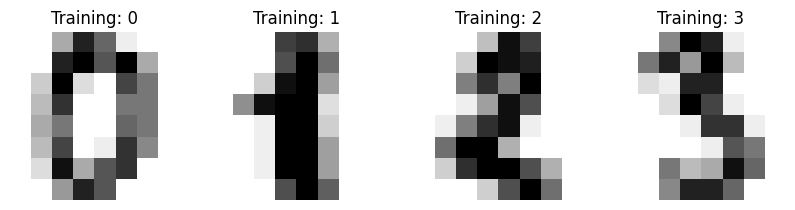

In [6]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize = (10,3))
for ax, image, label in zip(axes, df.images, df.target):
  ax.set_axis_off()
  ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
  ax.set_title("Training: %i" % label)

## **Data Pre-processing**

In [7]:
df.images.shape

(1797, 8, 8)

In [8]:
df.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [9]:
df.images[0].shape

(8, 8)

In [10]:
len(df.images)

1797

In [11]:
n_samples = len(df.images)
data = df.images.reshape((n_samples, -1))

In [12]:
data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [13]:
data[0].shape

(64,)

In [14]:
data.shape

(1797, 64)

## Scaling Image Data

In [15]:
data.min()

0.0

In [16]:
data.max()

16.0

In [17]:
data = data/16

In [18]:
data.min()

0.0

In [19]:
data.max()

1.0

In [20]:
data[0]

array([0.    , 0.    , 0.3125, 0.8125, 0.5625, 0.0625, 0.    , 0.    ,
       0.    , 0.    , 0.8125, 0.9375, 0.625 , 0.9375, 0.3125, 0.    ,
       0.    , 0.1875, 0.9375, 0.125 , 0.    , 0.6875, 0.5   , 0.    ,
       0.    , 0.25  , 0.75  , 0.    , 0.    , 0.5   , 0.5   , 0.    ,
       0.    , 0.3125, 0.5   , 0.    , 0.    , 0.5625, 0.5   , 0.    ,
       0.    , 0.25  , 0.6875, 0.    , 0.0625, 0.75  , 0.4375, 0.    ,
       0.    , 0.125 , 0.875 , 0.3125, 0.625 , 0.75  , 0.    , 0.    ,
       0.    , 0.    , 0.375 , 0.8125, 0.625 , 0.    , 0.    , 0.    ])

## Train Test Split Data

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
x_train, x_test, y_train, y_test = train_test_split(data, df.target, train_size=0.3)

In [23]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((539, 64), (1258, 64), (539,), (1258,))

## Random Forest Model

In [24]:
from sklearn.ensemble import RandomForestClassifier

In [25]:
rf = RandomForestClassifier()

In [26]:
rf.fit(x_train, y_train)

RandomForestClassifier()

## Predict Test Data

In [27]:
y_pred = rf.predict(x_test)

In [28]:
print(y_pred)

[3 8 1 ... 2 8 2]


## Model Accuracy

In [29]:
from sklearn.metrics import confusion_matrix, classification_report

In [30]:
confusion_matrix(y_test, y_pred)

array([[126,   0,   0,   0,   2,   0,   0,   0,   0,   0],
       [  0, 123,   0,   1,   1,   0,   1,   0,   1,  10],
       [  0,   0, 114,   1,   0,   0,   0,   0,   6,   1],
       [  0,   1,   0, 120,   0,   1,   0,   2,   1,   1],
       [  0,   0,   0,   0, 122,   1,   0,   1,   0,   2],
       [  0,   0,   0,   0,   1, 121,   1,   0,   1,   2],
       [  0,   0,   0,   0,   1,   0, 124,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 121,   0,   2],
       [  0,   3,   2,   0,   1,   2,   1,   1, 116,   0],
       [  0,   0,   0,   1,   0,   0,   0,   0,   1, 117]])

In [31]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       128
           1       0.97      0.90      0.93       137
           2       0.98      0.93      0.96       122
           3       0.98      0.95      0.96       126
           4       0.95      0.97      0.96       126
           5       0.97      0.96      0.96       126
           6       0.98      0.99      0.98       125
           7       0.97      0.98      0.98       123
           8       0.92      0.92      0.92       126
           9       0.87      0.98      0.92       119

    accuracy                           0.96      1258
   macro avg       0.96      0.96      0.96      1258
weighted avg       0.96      0.96      0.96      1258



## Explanation

###Handwritten Digit Prediction with Random Forest Classifier:

1.Data Preparation:
- Load the "Digits" dataset using
sklearn.datasets.load_digits().
- Split the data into training and testing sets using
sklearn.model_selection.train_test_split().

2.Model Training:

- Create a RandomForestClassifier instance.
- Train the model on the training data using
model.fit(X_train, y_train).

3.Prediction:

- Use the trained model to predict the digit class for each image in the testing set using
model.predict(X_test).

4.Evaluation:

- Calculate the confusion matrix using
sklearn.metrics.confusion_matrix(y_true, y_pred) to visualize the correct and incorrect predictions for each digit class.
- Generate a classification report using
sklearn.metrics.classification_report(y_true, y_pred)
to obtain metrics like precision, recall, and F1-score for each digit class.

5.Interpretation:

Analyze the confusion matrix and classification report to assess the model's performance and identify areas for improvement.